                 date     open    close     high      low  volume
0 2010-01-04 22:00:00  1.43332  1.44144  1.44563  1.42587   55015
1 2010-01-05 22:00:00  1.44144  1.43676  1.44845  1.43472   60382
2 2010-01-06 22:00:00  1.43676  1.44091  1.44357  1.42835   58258
3 2010-01-07 22:00:00  1.44091  1.43104  1.44476  1.43000   56049
4 2010-01-08 22:00:00  1.43104  1.44156  1.44399  1.42646   58253


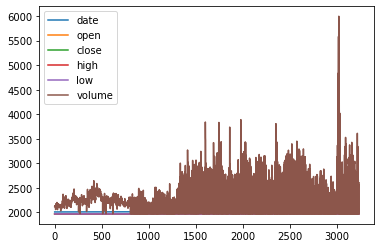

In [1]:
import datetime as dt
from matplotlib import pyplot
# load dataset
import fxcmpy
TOKEN = 'ccf0e2248bf73ca5f37919cc53913fa67935cea4'
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error', server='real')
start = dt.datetime(2010, 1, 1)
stop = dt.datetime(2020, 11, 25)
series = con.get_candles('EUR/USD', period='D1',start=start, stop=stop,columns=['asks', 'tickqty'],with_index=False)

# Rename the columns
series.rename(columns = {'askopen':'open',
                       'askclose':'close',
                       'askhigh':'high',
                       'asklow':'low',
                       'tickqty':'volume'}, inplace = True) 

# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [2]:
series = series.close
series

0       1.44144
1       1.43676
2       1.44091
3       1.43104
4       1.44156
         ...   
3230    1.18583
3231    1.18571
3232    1.18421
3233    1.18981
3234    1.19204
Name: close, Length: 3235, dtype: float64

#Baseline model: ARIMA(4,1,0)

c:\users\habiw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


Test RMSE: 0.002


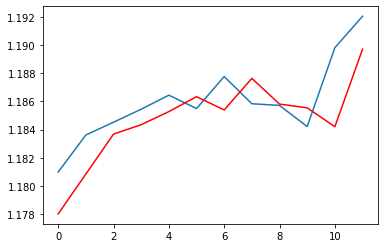

In [3]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore') 

# split into train and test sets
X = series.values
train, test = X[0:-12], X[-12:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#The “disp” Parameter
The first parameter we will look at is the disp parameter.

This is described as follows:

If True, convergence information is printed. For the default l_bfgs_b solver, disp controls the frequency of the output during the iterations. disp < 0 means no output in this case.

By default, this parameter is set to 1, which shows output.

We are dealing with this first because it is critical in removing all of the convergence output when evaluating the ARIMA model using walk-forward validation.

Setting it to False turns off all of this noise.

In [4]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=False)
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.004


In [5]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=False, transparams=False)
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.004


In [8]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=False, trend='c')
	print(model_fit.params)
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

[-0.01151018  0.07130201 -0.02940878 -0.04819449 -0.00444445]
[-0.01187925  0.07112022 -0.02992685 -0.04830804 -0.00438298]
[-0.01181224  0.07105423 -0.02988811 -0.04821511 -0.00436673]
[-0.01202228  0.07101614 -0.02967416 -0.04833414 -0.00466539]
[-0.0120176   0.07101352 -0.02967356 -0.04833925 -0.00466241]
[-0.01185549  0.071015   -0.02976999 -0.04831846 -0.00482873]
[-0.01178928  0.07104398 -0.0297684  -0.04835562 -0.00482336]
[-0.01200258  0.07100661 -0.02985889 -0.04836205 -0.00470587]
[-0.01221479  0.07112734 -0.02991093 -0.04845169 -0.00469757]
[-0.0120294   0.07102216 -0.03000932 -0.04841007 -0.00462405]
[-0.01216077  0.0709569  -0.02992665 -0.04834028 -0.0046617 ]
[-0.0123175   0.07101225 -0.03000643 -0.04823904 -0.00457882]
[-0.01234999  0.07102584 -0.0299969  -0.04825569 -0.00455578]
[-0.0127833   0.07106133 -0.02983063 -0.04813172 -0.00475667]
[-0.0127282   0.0709972  -0.02983189 -0.04815548 -0.00477361]
[-0.01260375  0.07101603 -0.02997689 -0.04815742 -0.00482827]
[-0.0126

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[-0.00171057  0.0271391   0.02231321 -0.0341038   0.01160086]
[-0.00197663  0.02681772  0.02244477 -0.0340393   0.01174602]
[-0.00189741  0.026758    0.02254397 -0.03407817  0.01172334]
[-0.00187644  0.02676261  0.02252827 -0.0340522   0.01171303]
[-0.00171947  0.02677127  0.02256406 -0.03417271  0.01190682]
[-0.00184624  0.02671349  0.02256379 -0.03420464  0.01199807]
[-0.00133176  0.02652536  0.02281599 -0.03420927  0.0121113 ]
[-0.00133607  0.02651912  0.02281776 -0.03421128  0.01211109]
[-0.00131085  0.02651886  0.02285443 -0.03422167  0.01212274]
[-0.0014207   0.02651051  0.0228573  -0.03438311  0.0121668 ]
[-0.00073801  0.02629617  0.02292015 -0.03440623  0.01315728]
[-0.00053663  0.02668732  0.02283606 -0.03438954  0.01317246]
[-4.78254017e-05  2.69640299e-02  2.37785232e-02 -3.45980067e-02
  1.32217228e-02]
[ 0.00013013  0.02720864  0.02387325 -0.03425927  0.01315361]
[-0.000274    0.02700785  0.02331822 -0.03446476  0.01238034]
[ 4.64095143e-05  2.66490940e-02  2.34670740e-02 

In [6]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=False, trend='nc')
	print(model_fit.params)
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat)
	history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

[-0.00576741 -0.00443525 -0.03816422  0.00573555]
[-0.0057799  -0.00414105 -0.03818502  0.00570927]
[-0.00532108 -0.00416711 -0.03745813  0.00567512]
[-0.00455392 -0.00384967 -0.03747291  0.006199  ]
[-0.00493044 -0.00438694 -0.03769994  0.00619721]
[-0.00546432 -0.0036404  -0.03663191  0.00662953]
[-0.00552989 -0.00360676 -0.03667792  0.00656155]
[-0.00555042 -0.00324716 -0.03687123  0.00682248]
[-0.00573111 -0.00320705 -0.03736017  0.00708074]
[-0.00589241 -0.00308209 -0.037387    0.00739919]
[-0.00591147 -0.00305184 -0.03740873  0.0074033 ]
[-0.00589318 -0.00315749 -0.03724147  0.00728358]
[-0.00589181 -0.00315718 -0.03724322  0.00728602]
[-0.00589054 -0.00312009 -0.03723355  0.0072432 ]
[-0.00591574 -0.00312427 -0.03729252  0.00722755]
[-0.00581049 -0.00318835 -0.03730302  0.0070767 ]
[-0.00596127 -0.00324965 -0.03726908  0.00707645]
[-0.00615212 -0.00290191 -0.03712823  0.00699051]
[-0.0061624  -0.0028974  -0.03713651  0.00698691]
[-0.00615898 -0.00305257 -0.03707004  0.00686242]


Solver=lbfgs, Test RMSE: 0.004, Time=222.620394
Solver=bfgs, Test RMSE: 0.004, Time=135.928677
Solver=newton, Test RMSE: 0.004, Time=175.599572
Solver=nm, Test RMSE: 0.004, Time=159.314127
Solver=cg, Test RMSE: 0.004, Time=258.091246
Solver=ncg, Test RMSE: 0.004, Time=177.227589
Solver=powell, Test RMSE: 0.004, Time=121.247190


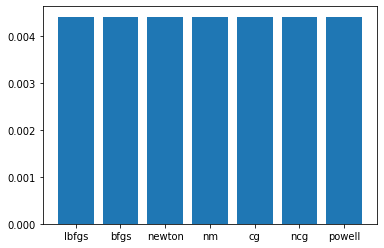

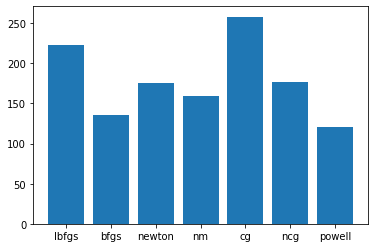

In [7]:
from time import time
# solvers
solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
scores = []
times = []
for solver in solvers:
	start_time = time()
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		# fit model
		model = ARIMA(history, order=(4,1,0))
		model_fit = model.fit(disp=False, solver=solver)
		# one step forecast
		yhat = model_fit.forecast()[0]
		# store forecast and ob
		predictions.append(yhat)
		history.append(test[t])
	# evaluate forecasts
	rmse = sqrt(mean_squared_error(test, predictions))
	timing = time() - start_time
	scores.append(rmse)
	times.append(timing)
	print('Solver=%s, Test RMSE: %.3f, Time=%f' % (solver, rmse, timing))
# plot scores
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, scores)
pyplot.xticks(ticks, solvers)
pyplot.show()
# plot times
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, times)
pyplot.xticks(ticks, solvers)
pyplot.show()